In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ghifarullah19/machine_learning_dicoding/main/dataset/SPAM_text_message_20170820_Data.csv')

In [2]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [3]:
category = pd.get_dummies(df.Category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Category')
df_baru

,Message,ham,spam
0,"Go until jurong point, crazy.. Available only ...",1,0
1,Ok lar... Joking wif u oni...,1,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,U dun say so early hor... U c already then say...,1,0
4,"Nah I don't think he goes to usf, he lives aro...",1,0
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,0,1
5568,Will ü b going to esplanade fr home?,1,0
5569,"Pity, * was in mood for that. So...any other s...",1,0
5570,The guy did some bitching but I acted like i'd...,1,0


In [4]:
# Agar dapat diproses model, ubah nilai-nilai tersebut ke numpy array
sinopsis = df_baru['Message'].values
label = df_baru[['ham', 'spam']].values

In [5]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

In [6]:
# Tokenisasi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sinopsis_latih)
tokenizer.fit_on_texts(sinopsis_test)

sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax'),
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('loss') > 0.9 and logs.get('val_loss') > 0.9:
      print('\nAkurasi telah mencapai > 90%!')
      self.model.stop_training = True

callbacks = myCallback()

In [9]:
num_epochs = 10

history = model.fit(
    padded_latih,
    label_latih,
    epochs=num_epochs,
    validation_data=(padded_test, label_test),
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/10
140/140 - 22s - loss: 0.2274 - accuracy: 0.9262 - val_loss: 0.0471 - val_accuracy: 0.9874 - 22s/epoch - 157ms/step
Epoch 2/10
140/140 - 18s - loss: 0.0386 - accuracy: 0.9886 - val_loss: 0.0516 - val_accuracy: 0.9892 - 18s/epoch - 130ms/step
Epoch 3/10
140/140 - 17s - loss: 0.0169 - accuracy: 0.9969 - val_loss: 0.0390 - val_accuracy: 0.9892 - 17s/epoch - 122ms/step
Epoch 4/10
140/140 - 17s - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.0588 - val_accuracy: 0.9910 - 17s/epoch - 122ms/step
Epoch 5/10
140/140 - 17s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0589 - val_accuracy: 0.9892 - 17s/epoch - 122ms/step
Epoch 6/10
140/140 - 19s - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0638 - val_accuracy: 0.9919 - 19s/epoch - 137ms/step
Epoch 7/10
140/140 - 18s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0811 - val_accuracy: 0.9883 - 18s/epoch - 128ms/step
Epoch 8/10
140/140 - 17s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0747 - val_accuracy: 0.9901 - 17s/epoch - 123

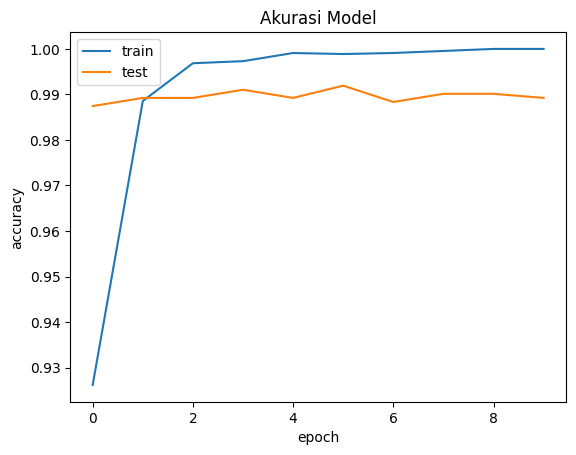

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

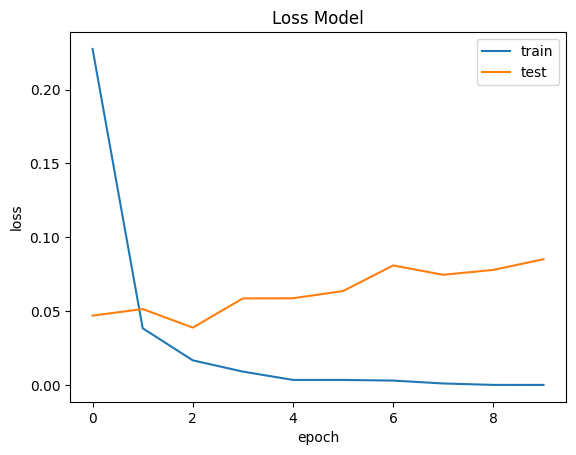

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()